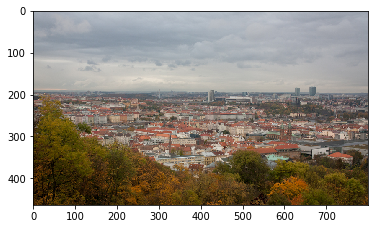

In [1]:
%matplotlib inline
import kornia
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('img/prague.png')
timg = kornia.utils.image_to_tensor(np.array(img)).float() / 255.
timg = timg.view(1, *timg.shape)  # 1xCxHxW
plt.imshow(kornia.utils.tensor_to_image(timg[0]))


In [2]:
#Lets read pre-detected features in Oxford affine ellipse [x y a b c] format
ells = torch.from_numpy(np.loadtxt('img/prague.hesaffnet', skiprows=2)).float()
print (ells.shape)
print(ells[0])

torch.Size([2000, 5])
tensor([ 4.4487e+02,  3.2709e+02,  7.1538e-04, -6.9498e-05,  1.0999e-03])


In [3]:
#Now, lets convert ellipses into kornia LAF format:
laf = kornia.feature.ell2LAF(ells.unsqueeze(0))

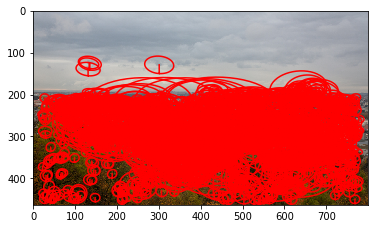

In [4]:
kornia.feature.visualize_LAF(timg,laf)

In [7]:
#Now, lets extract some patches
patches_aliased = kornia.feature.extract_patches_simple(timg,
                                                        kornia.feature.normalize_LAF(laf,timg))
patches_nice =  kornia.feature.extract_patches_from_pyramid(timg, 
                                                            kornia.feature.normalize_LAF(laf,timg))


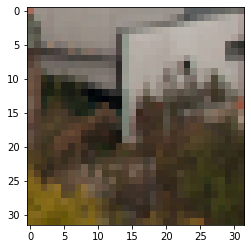

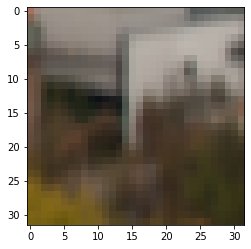

In [15]:
idx = 102
pim = kornia.utils.tensor_to_image(patches_aliased[0,idx:idx+1])[0]
plt.imshow(pim)
pimp = kornia.utils.tensor_to_image(patches_nice[0,idx:idx+1])[0]
plt.figure()
plt.imshow(pimp)
